# Un tout petit Network

Ici, nous allons implementer le Neural Network le plus simple possible.  
Il s'agira d'un réseau avec trois inputs, et un output :  
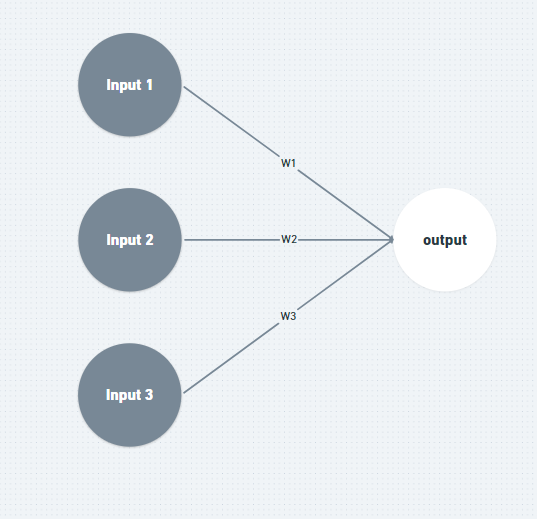




In [1]:
import numpy as np  #La bibliothèque indispensable pour les opérations mathématiques.

En premier lieux, nous allons créer notre dataset. 

Pour cet exemple, il sera consitué de tableaux à trois booléens.  
Le résultat attendu sera de 1 si le premier et troisieme booléens sont positifs, et 0 dans le cas contraire.
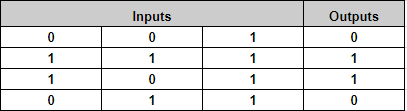


In [2]:
#Matrice d'inputs
inputs = np.array([  [0, 0, 1],  
                     [1, 1, 1],  
                     [1, 0, 1],  
                     [0, 1, 1]])

#Matrice d'outputs attendus
outputs = np.array([[0, 1, 1, 0]]).T

print("Output Matrice : \n{}".format(outputs))


Output Matrice : 
[[0]
 [1]
 [1]
 [0]]


L'etape suivante vas être d'initialiser nos poids.  
Pour cet exemple, nous allons utiliser une seed, pour rendre nos calculs déterministes.  
Malgré la fonction random utilisé, notre système réagira toujours de la même façon.

In [3]:
#En utilisant cette ligne, 
np.random.seed(1)

#Initialise nos quatre poids entre -1 et 1.
weights = 2*np.random.random((3,1))-1

print("Weights matrice : \n{}".format(weights))

Weights matrice : 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


Avant de passer à l'entrainement, il nous reste encore à définir notre fonction d'activation.  
Ici, nous allons utiliser la fonction __sigmoide__, qui rajoute de la non-linéarité dans notre modèle, en plus de ramener nos valeures entre 0 et 1 :  
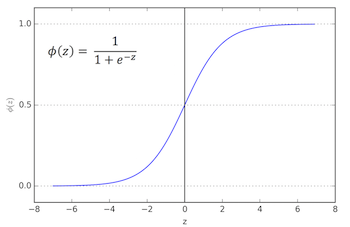  

In [4]:
def sigmoid(x, derivation=False):
    if(derivation):
        return x*(1-x)
    return 1/(1+np.exp(-x))

A cette étape, nous pouvons faire un premier test, pour voir si notre modèle est capable de prédire les résultats qu'on attend de lui :

In [5]:
result = sigmoid(np.dot(inputs, weights))
print(result)

#Calcul de l'erreur en pourcentage
error = outputs - result
error = np.mean(np.abs(error))
error = float(int(error*10000))/100
print("Taux d'erreur :"+str(error)+"%")

[[0.2689864 ]
 [0.3262757 ]
 [0.23762817]
 [0.36375058]]
Taux d'erreur :51.72%


Sachant que les résultats attendus sont : (0, 1, 1, 0), nous somme à plus de 50% d'erreur.
C'est normal, à ce stade, notre modèle est encore initialisé aléatoirement. Le réseau à besoin d'entrainement.  

Pour la prochaine étape, nous allons faire un millier d'itérations pour corriger les poids qui relient chaque neuronnes d'input à notre résultat.

In [6]:
nbIterations = 1000
for _ in range(nbIterations):
    #Forward propagation
    #C'est ici qu'on multiplie nos inputs par leurs poids correspondants
    result = sigmoid(np.dot(inputs, weights))
    
    error = outputs - result
    
    delta = error * sigmoid(result, True)
    
    weights += np.dot(inputs.T, delta)
    
print("Output apres {} iterations: \n{}".format(nbIterations, result))
error = np.mean(np.abs(error))
error = float(int(error*10000))/100
print("Taux d'erreur :"+str(error)+"%")

Output apres 1000 iterations: 
[[0.03178421]
 [0.97414645]
 [0.97906682]
 [0.02576499]]
Taux d'erreur :2.6%


# Resultats :

On voit bien qu'après 1000 itérations, le réseau de neuronnes ne commet plus que 2% d'erreures.  
Etant donné la simplicité de ce modèle, il serais facile de le faire tourner sur 10000, voire 100000 itérations, et ainsi réduire encore le taux d'erreures.

# Sources :

Ce micro tuto est une simple adaptation de l'article trouvable sur le site __[iamtrask](https://iamtrask.github.io/2015/07/12/basic-python-network/)__, tout le mérite leurs reviens

N'hesitez pas à aller voir les vidéos de __[3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKk&t=407s)__, qui fait un travail fantastique pour expliquer clairement les fonctionnements des réseaux de neuronnes, ainsi que beaucoup d'autre sujets reliés au Machine Learning